In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [11]:
sns.set(style='ticks')

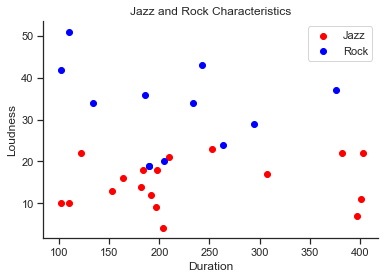

In [126]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
sns.despine()
plt.show()

In [127]:
##model with only 1 neighbor is just nearest neighbor (tends to overfit the training set)
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X, Y)

#predicting a random data point as either Jazz or not Jazz
neighbors.predict([[30, 250]])
neighbors.kneighbors([[30,250]])

(array([[ 7.61577311, 14.76482306, 15.23154621, 16.4924225 , 41.        ]]),
 array([[23,  2,  9, 24, 18]]))

In [18]:
#model with more than 1 neighbor is K-nearest neighbor, each neighbor gets a vote on which class
#the outcome is in. does this using probabilities
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X, Y)

#predicting a random data point as either Jazz or not Jazz
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


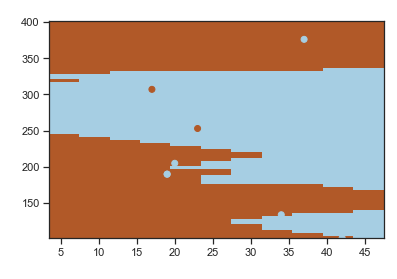

In [28]:
X = np.array(X)
Y = np.array(Y)

h = 4.0

x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness', color='white')
plt.ylabel('Duration', color='white')
plt.title('Mesh Visualization', color='white')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

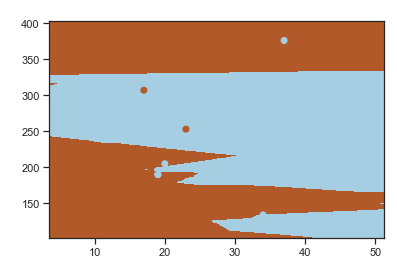

In [34]:
h = 0.25

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness', color='white')
plt.ylabel('Duration', color='white')
plt.title('Mesh Visualization', color='white')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [122]:
def knn(x, num_neigh, target):
    neigh_dist = []
    for i in x:
        dist = ((i[0] - target[0][0]) ** 2 + (i[1] - target[0][1])  ** 2) ** 0.5
        neigh_dist.append(dist)
    neigh_dist = np.asarray(neigh_dist).reshape((-1, 1))
    kn_neigh = np.concatenate((x, neigh_dist), axis=1)
    df = pd.DataFrame(kn_neigh, columns=['tar_x', 'tar_y', 'dist'])
    neighbors = df.sort_values(by=['dist'])
    return neighbors.head(num_neigh)
  

target = [[30,250]]
knn(X, 5, target)

,tar_x,tar_y,dist
23,23.0,253.0,7.615773
2,43.0,243.0,14.764823
9,24.0,264.0,15.231546
24,34.0,234.0,16.492423
18,21.0,210.0,41.000000
